In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, stats, probplot
from sklearn.cluster import KMeans
pd.set_option('display.max_rows', 20)

In [89]:
df = pd.read_stata("HCMST 2017 fresh sample for public sharing draft v1.1.dta")
original = pd.read_stata("HCMST 2017 fresh sample for public sharing draft v1.1.dta")



In [90]:
data = pd.read_stata("HCMST 2017 fresh sample for public sharing draft v1.1.dta")


In [91]:
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Missing_pct'] = df.isnull().mean().round(2).values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    summary['Fourth Value'] = df.loc[3].values
    summary['Fifth Value'] = df.loc[4].values
    return summary

display(summarytable(df))

Dataset Shape: (3510, 285)


Name    dtypes  Missing  Missing_pct  Uniques  \
0                  CaseID     int16        0         0.00     3510   
1              CASEID_NEW     int32        0         0.00     3510   
2                   qflag  category        0         0.00        2   
3                 weight1   float64      516         0.15     1356   
4          weight1_freqwt   float32      516         0.15     1356   
..                    ...       ...      ...          ...      ...   
280      interracial_5cat  category      145         0.04        2   
281  partner_mother_yrsed   float32      187         0.05       13   
282  subject_mother_yrsed   float32      132         0.04       13   
283         partner_yrsed   float32      127         0.04       13   
284         subject_yrsed   float32        0         0.00       13   

    First Value Second Value Third Value Fourth Value Fifth Value  
0             2            3           5            6           7  
1       2014039      2019003     2145527      2648857     2623465  
2     Qualified    Qualified   Qualified    Qualified   Qualified  
3           NaN       0.9078      0.7205       1.2597      0.8686  
4           NaN      71115.0     56442.0      98682.0     68044.0  
..          ...          ...         ...          ...         ...  
280          no           no          no           no          no  
281        12.0         12.0         9.0         16.0        14.0  
282        14.0         16.0         7.5         12.0        17.0  
283        12.0         17.0        14.0         12.0        16.0  
284        14.0         17.0        17.0         12.0        16.0  

[285 rows x 10 columns]

In [92]:
df.drop(df.iloc[:, 2:14], inplace=True, axis=1) 


In [93]:
#info point
def give_info(data):

    info = (pd.concat([data.dtypes,
                   data.nunique(),
                   data.isnull().sum(),
                   data.isnull().sum()*100/len(data)],axis=1))
    info = info.rename(columns={0:'Data types',
                            1:'Uniques values', 
                            2:'Number of null Values',
                            3:'Percentage of null values'})

    return info

give_info(df)

Data types  Uniques values  Number of null Values  \
CaseID                    int16            3510                      0   
CASEID_NEW                int32            3510                      0   
S1                     category               2                      0   
S2                     category               3                   2085   
S3                     category               2                   2862   
...                         ...             ...                    ...   
interracial_5cat       category               2                    145   
partner_mother_yrsed    float32              13                    187   
subject_mother_yrsed    float32              13                    132   
partner_yrsed           float32              13                    127   
subject_yrsed           float32              13                      0   

                      Percentage of null values  
CaseID                                 0.000000  
CASEID_NEW                             0.000000  
S1                                     0.000000  
S2                                    59.401709  
S3                                    81.538462  
...                                         ...  
interracial_5cat                       4.131054  
partner_mother_yrsed                   5.327635  
subject_mother_yrsed                   3.760684  
partner_yrsed                          3.618234  
subject_yrsed                          0.000000  

[273 rows x 4 columns]

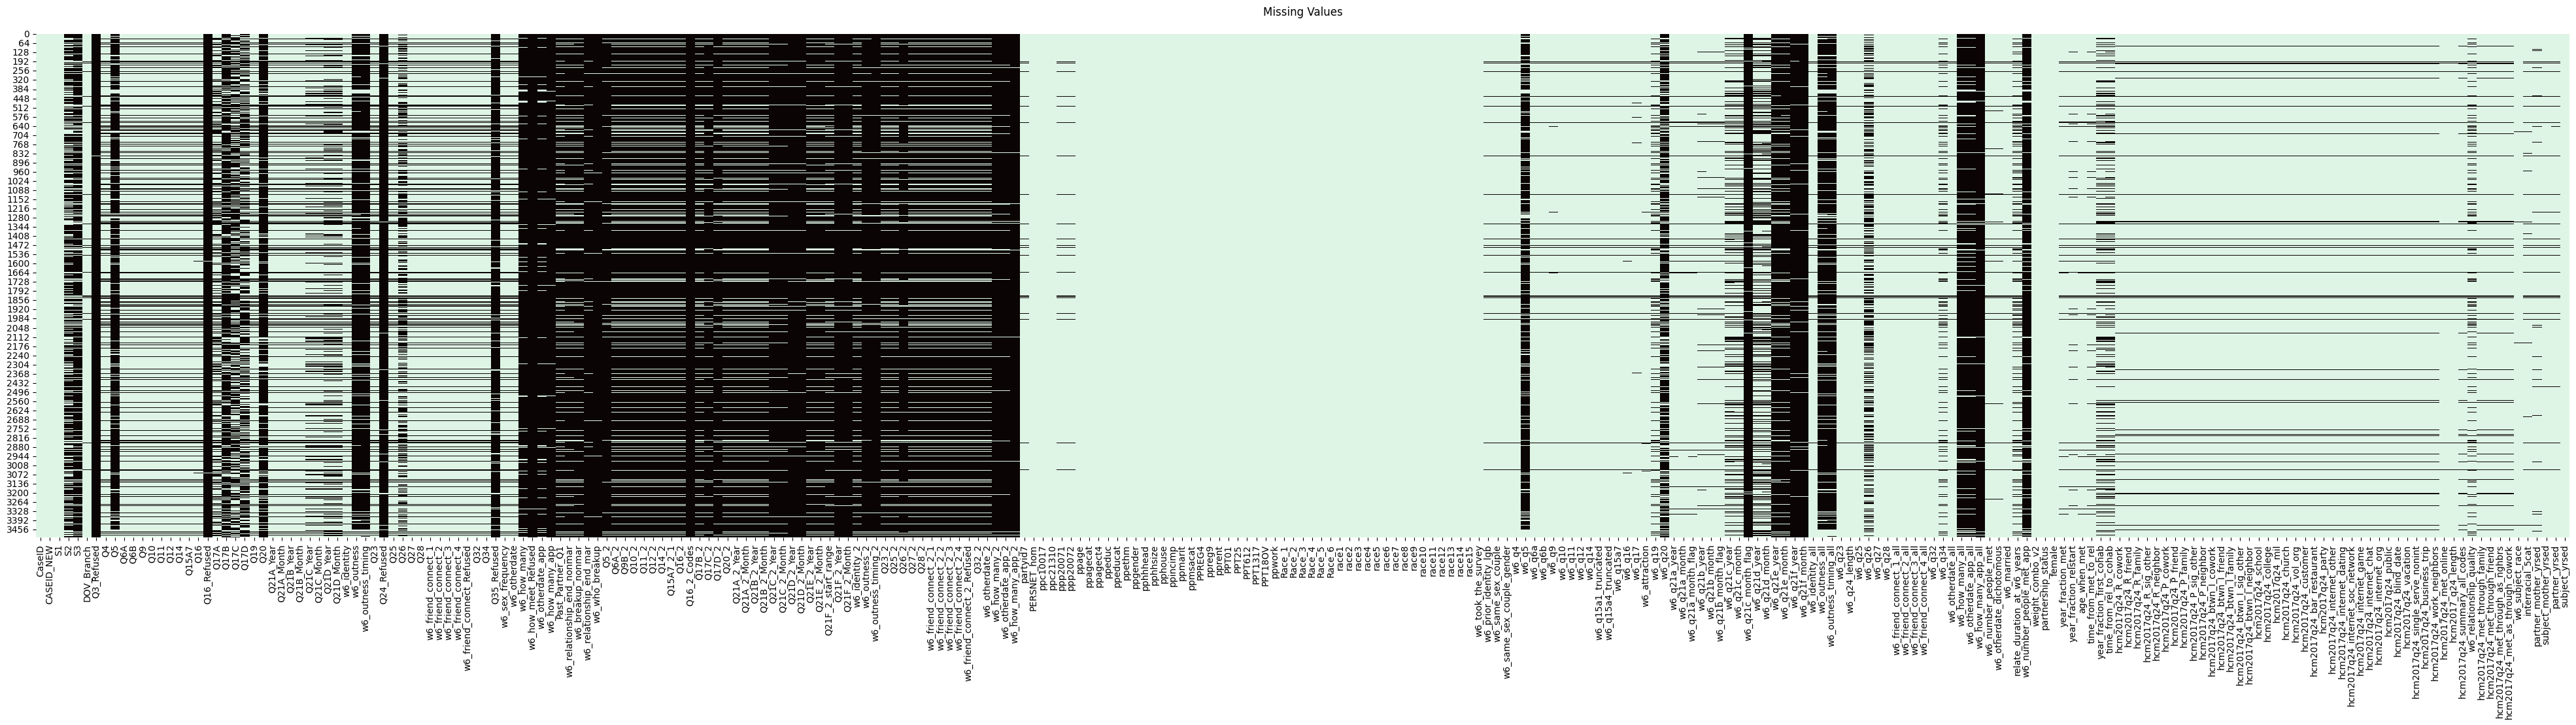

In [94]:
plt.figure(figsize=(50, 10))
plt.title('Missing Values\n')
sns.heatmap(df.notnull(), cbar=False, cmap = 'mako')
plt.show()

In [95]:
for i,name in enumerate(df.columns):         
    if df[name].dtypes == 'category':         
        df[name] = df[name].astype('str')         
        for j,nam in enumerate(df[name].unique()):             
            df[name] = df[name].mask(df[name]==nam, j)

In [96]:
for i,name in enumerate(df.columns):
    if df[name].isna().unique().sum() == 1:
        del df[name]

# Dataset split and feature selection

In [97]:
df['Q34'] = df['Q34'].replace({'Refused':0, 'Very Poor':1, 'Poor': 2,'Fair': 3, 'Good':4, 'Excellent':5})

In [98]:
print(df["S1"].value_counts())
print(data["S1"].value_counts())
print(data["S2"].value_counts())

1    2085
0    1425
Name: S1, dtype: int64
Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64
Yes, I have a sexual partner (boyfriend or girlfriend)                                 694
No, I am single, with no boyfriend, no girlfriend and no romantic or sexual partner    648
I have a romantic partner who is not yet a sexual partner                               83
Name: S2, dtype: int64


In [99]:
data.drop(data.iloc[:, 2:14], inplace=True, axis=1) 

In [100]:
df_married = data.loc[data['S1'] == 'Yes, I am Married'] 
df_friend =  data.loc[data['S2'] == 'Yes, I have a sexual partner (boyfriend or girlfriend)']

In [101]:
print(df_married['Q34'].value_counts())
print(df_friend['Q34'].value_counts())

Excellent    1348
Good          572
Fair          115
Poor           22
Very Poor      16
Refused         6
Name: Q34, dtype: int64
Excellent    329
Good         269
Fair          76
Poor          10
Very Poor      7
Refused        3
Name: Q34, dtype: int64


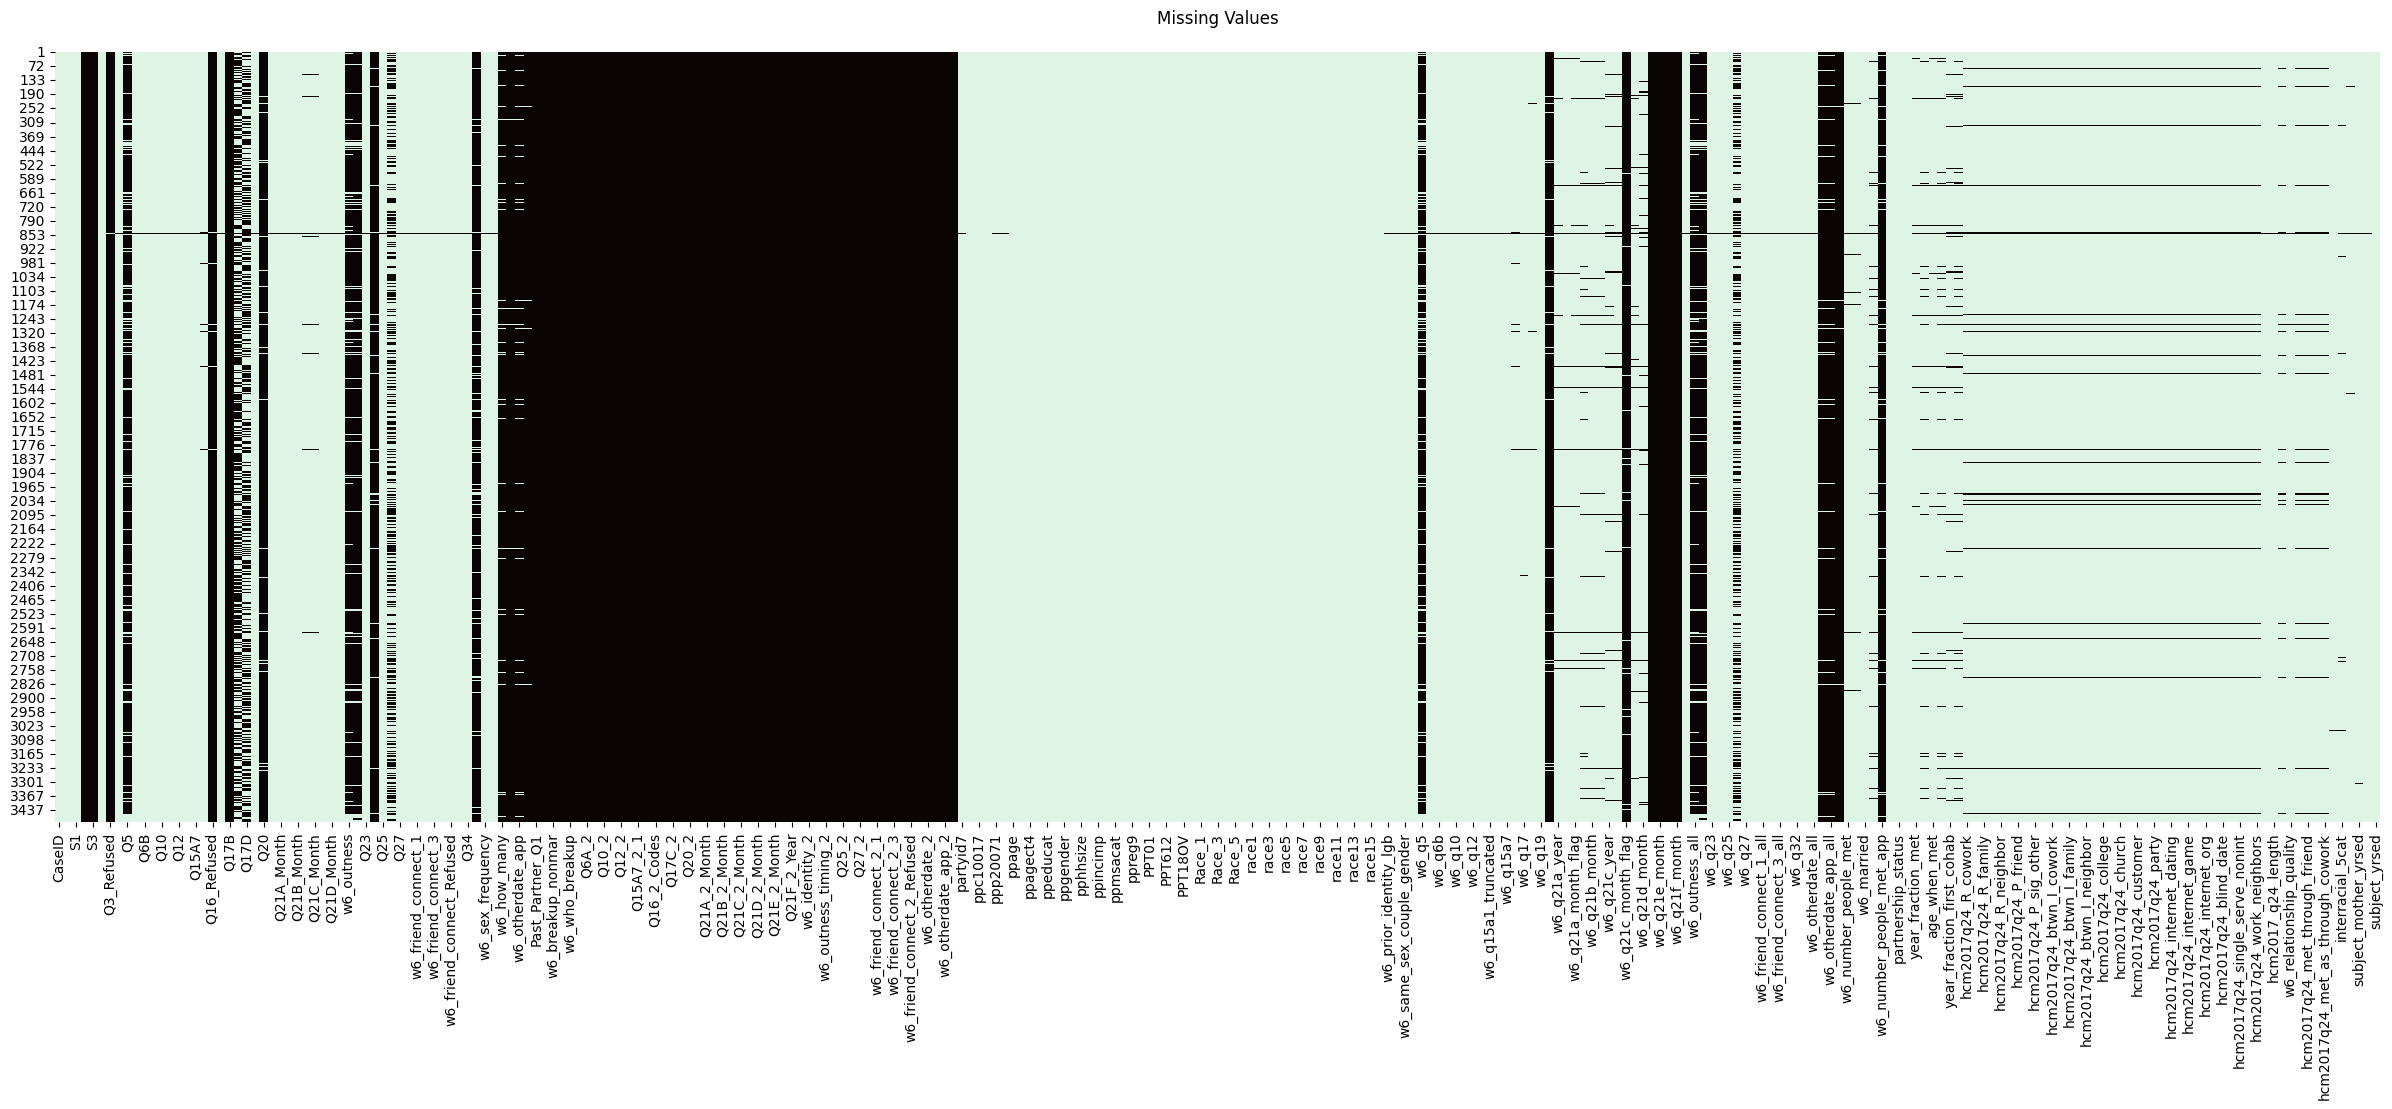

In [102]:
plt.figure(figsize=(30, 10))
plt.title('Missing Values\n')
sns.heatmap(df_married.notnull(), cbar=False, cmap = 'mako')
plt.show()

In [103]:
#info point
def give_info(data):

    info = (pd.concat([data.dtypes,
                   data.nunique(),
                   data.isnull().sum(),
                   data.isnull().sum()*100/len(data)],axis=1))
    info = info.rename(columns={0:'Data types',
                            1:'Uniques values', 
                            2:'Number of null Values',
                            3:'Percentage of null values'}) 

    return info

give_info(df_married)

Data types  Uniques values  Number of null Values  \
CaseID                    int16            2085                      0   
CASEID_NEW                int32            2085                      0   
S1                     category               1                      0   
S2                     category               0                   2085   
S3                     category               0                   2085   
...                         ...             ...                    ...   
interracial_5cat       category               2                     21   
partner_mother_yrsed    float32              13                     26   
subject_mother_yrsed    float32              13                     13   
partner_yrsed           float32              13                      9   
subject_yrsed           float32              13                      0   

                      Percentage of null values  
CaseID                                 0.000000  
CASEID_NEW                             0.000000  
S1                                     0.000000  
S2                                   100.000000  
S3                                   100.000000  
...                                         ...  
interracial_5cat                       1.007194  
partner_mother_yrsed                   1.247002  
subject_mother_yrsed                   0.623501  
partner_yrsed                          0.431655  
subject_yrsed                          0.000000  

[273 rows x 4 columns]

In [104]:
# Delete columns containing either 90% or more than 90% NaN Values
perc = 40.0
min_count =  int(((100-perc)/100)*df_married.shape[0] + 1)
df_married = df_married.dropna( axis=1, 
                thresh=min_count)

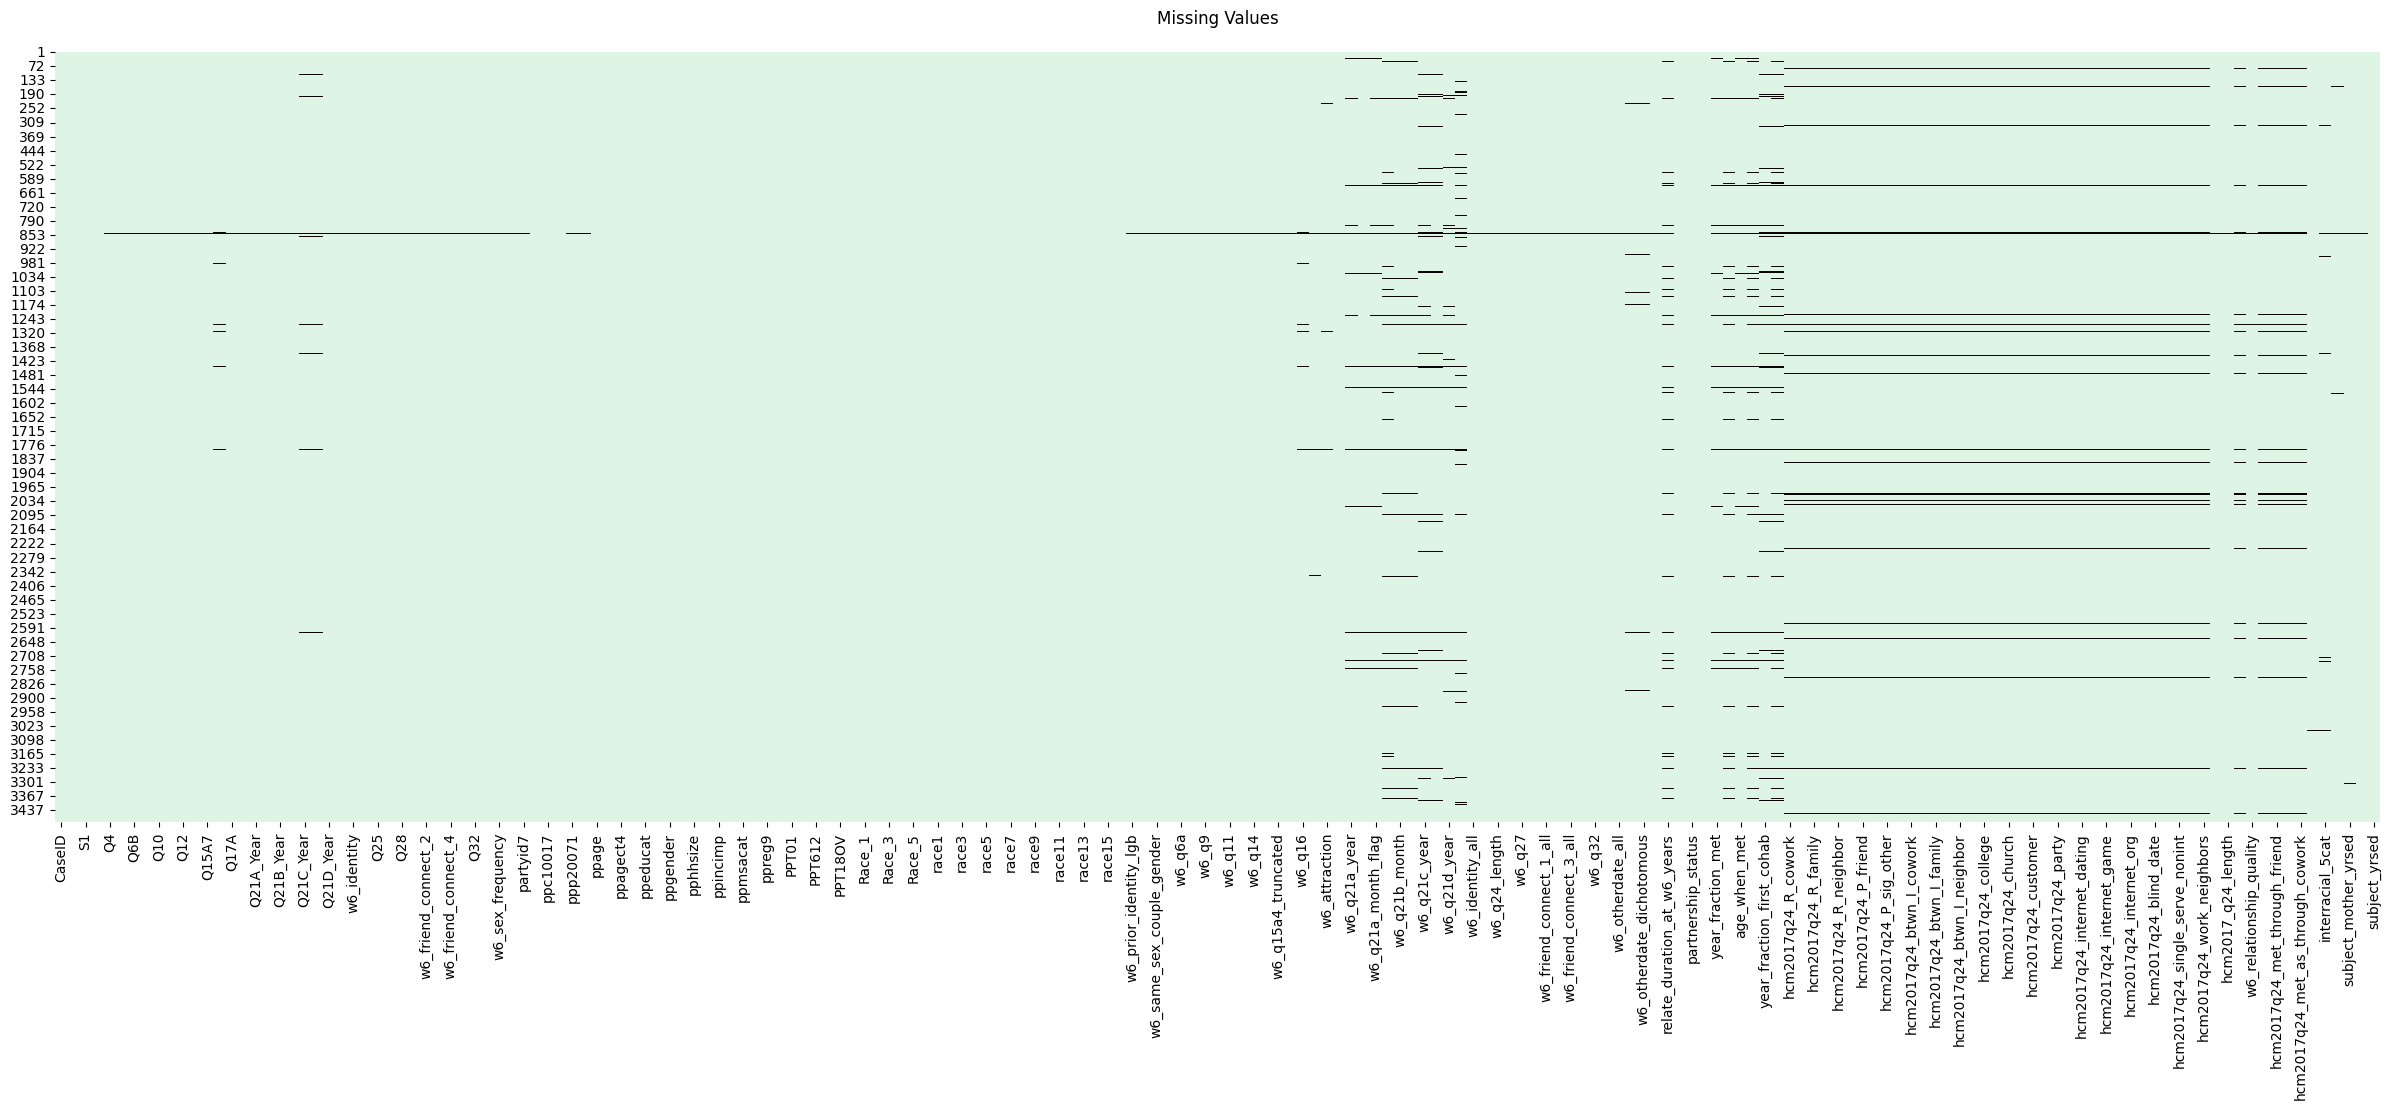

In [105]:
plt.figure(figsize=(30, 10))
plt.title('Missing Values\n')
sns.heatmap(df_married.notnull(), cbar=False, cmap = 'mako')
plt.show()

In [106]:
df_married = df_married.dropna() 

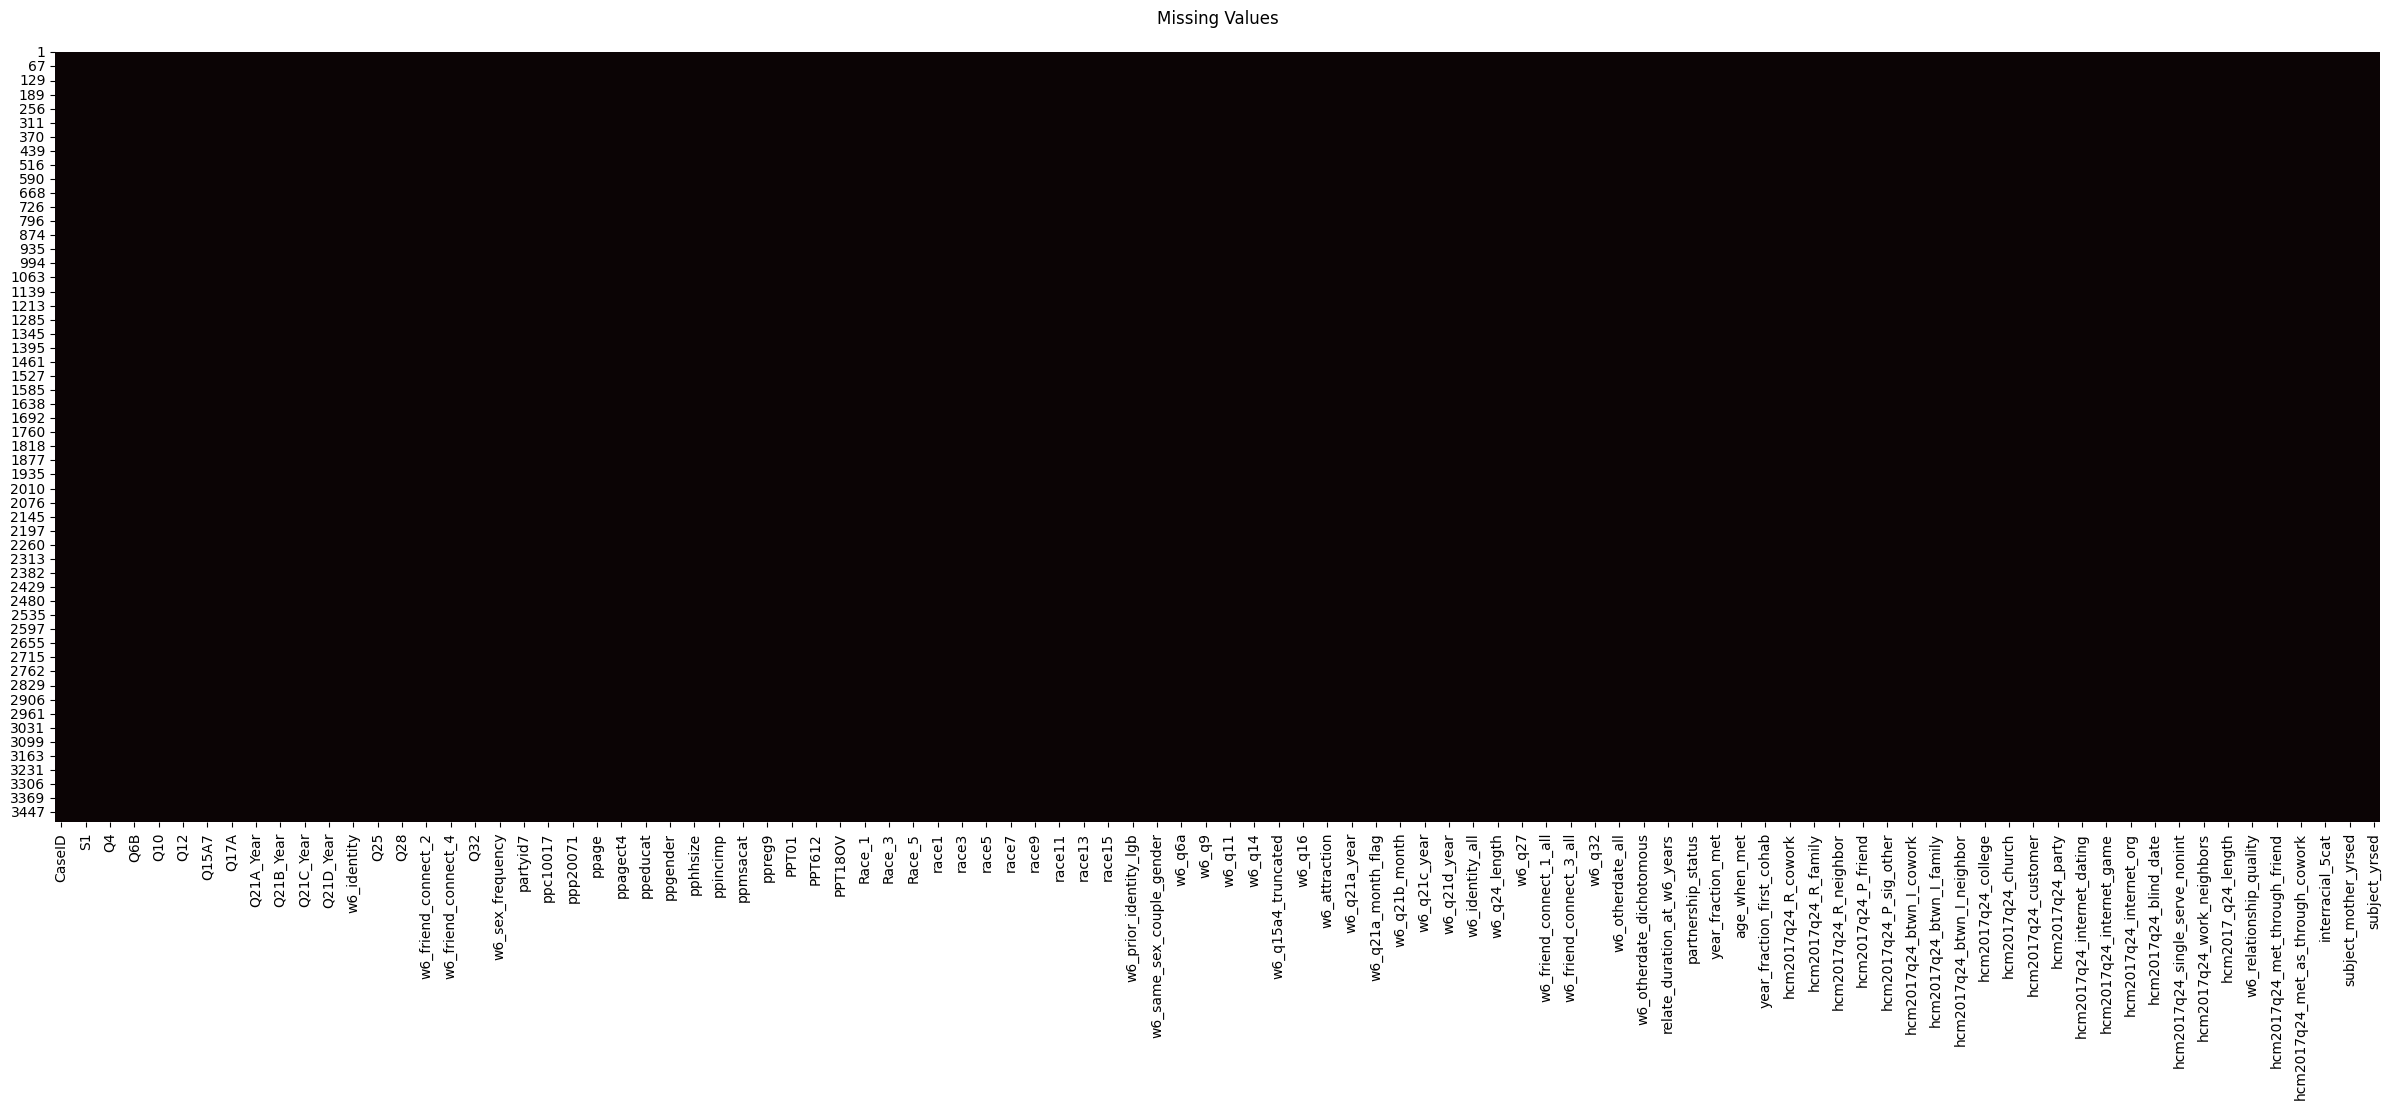

In [107]:
plt.figure(figsize=(30, 10))
plt.title('Missing Values\n')
sns.heatmap(df_married.notnull(), cbar=False, cmap = 'mako')
plt.show()

In [108]:
df_married

CaseID  CASEID_NEW                 S1 DOV_Branch  \
1          3     2019003  Yes, I am Married          1   
2          5     2145527  Yes, I am Married          1   
4          7     2623465  Yes, I am Married          1   
5          9     2917189  Yes, I am Married          1   
6         10     2919423  Yes, I am Married          1   
...      ...         ...                ...        ...   
3498    4295     2910409  Yes, I am Married          1   
3500    4297     2798559  Yes, I am Married          1   
3502    4301     2922343  Yes, I am Married          1   
3505    4304     1228389  Yes, I am Married          1   
3507    4307     2090075  Yes, I am Married          1   

                            Q4                          Q6A  \
1       [Partner Name] is Male  No (Not Latino or Hispanic)   
2     [Partner Name] is Female  No (Not Latino or Hispanic)   
4       [Partner Name] is Male  No (Not Latino or Hispanic)   
5     [Partner Name] is Female  No (Not Latino or Hispanic)   
6       [Partner Name] is Male  No (Not Latino or Hispanic)   
...                        ...                          ...   
3498    [Partner Name] is Male  No (Not Latino or Hispanic)   
3500    [Partner Name] is Male  No (Not Latino or Hispanic)   
3502    [Partner Name] is Male  No (Not Latino or Hispanic)   
3505    [Partner Name] is Male  No (Not Latino or Hispanic)   
3507    [Partner Name] is Male  No (Not Latino or Hispanic)   

                            Q6B    Q9                      Q10  \
1                         White  52.0          Masters degree   
2                         White  45.0         Associate degree   
4                         White  59.0        Bachelors degree   
5                         White  60.0        Bachelors degree   
6                         White  67.0  Some college, no degree   
...                         ...   ...                      ...   
3498     Other (please specify)  44.0       HS graduate or GED   
3500                      White  67.0  Some college, no degree   
3502                      White  42.0         Associate degree   
3505                      White  29.0        Bachelors degree   
3507  Black or African American  39.0        Bachelors degree   

                     Q11  ... hcm2017q24_met_through_family  \
1     HS graduate or GED  ...                            no   
2              9th grade  ...                            no   
4       Associate degree  ...                            no   
5     HS graduate or GED  ...                            no   
6     HS graduate or GED  ...                            no   
...                  ...  ...                           ...   
3498          10th grade  ...                            no   
3500  HS graduate or GED  ...                            no   
3502  HS graduate or GED  ...                            no   
3505  HS graduate or GED  ...                            no   
3507    Associate degree  ...                            no   

     hcm2017q24_met_through_friend hcm2017q24_met_through_as_nghbrs  \
1                               no                               no   
2                               no                               no   
4                               no                              yes   
5                               no                               no   
6                              yes                               no   
...                            ...                              ...   
3498                            no                               no   
3500                            no                               no   
3502                           yes                               no   
3505                            no                               no   
3507                            no                               no   

      hcm2017q24_met_as_through_cowork w6_subject_race interracial_5cat  \
1                                  yes           White               no   

In [109]:
for i,name in enumerate(df_married.columns):
    #if 'No, I am single, with no boyfriend, no girlfriend and no romantic or sexual partner' in df[name].unique():
    if df_married[name].dtypes == 'category':
        df_married[name] = df_married[name].astype('str')
        #print(df[name].unique())
        for j,nam in enumerate(df_married[name].unique()):
            df_married[name] = df_married[name].mask(df_married[name]==nam, j)
    print(df_married[name].dtypes)

int16
int32
object
object
object
object
object
object
object
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
object
object
object
object
object
object
object
float64
float64
object
object
float64
object
object
float64
object
float64
float64
object
float64
object
object
object
float32
object
object
object
object
object
object
object
object
object
object
float32
object
object
float32
float32
object
int8
float32
float32
float32
float32
float32

In [110]:
for i,name in enumerate(df_married.columns):
    if df_married[name].isna().unique().sum() == 1:
        del df_married[name]

In [111]:
df_married

CaseID  CASEID_NEW S1 DOV_Branch Q4 Q6A Q6B  Q9 Q10 Q11  ...  \
1          3     2019003  0          0  0   0   0   0   0   0  ...   
2          5     2145527  0          0  1   0   0   1   1   1  ...   
4          7     2623465  0          0  0   0   0   2   2   2  ...   
5          9     2917189  0          0  1   0   0   3   2   0  ...   
6         10     2919423  0          0  0   0   0   4   3   0  ...   
...      ...         ... ..        ... ..  ..  ..  ..  ..  ..  ...   
3498    4295     2910409  0          0  0   0   3  47   5  10  ...   
3500    4297     2798559  0          0  0   0   0   4   3   0  ...   
3502    4301     2922343  0          0  0   0   0   8   1   0  ...   
3505    4304     1228389  0          0  0   0   0  39   2   0  ...   
3507    4307     2090075  0          0  0   0   2  43   2   2  ...   

     hcm2017q24_met_through_family hcm2017q24_met_through_friend  \
1                                0                             0   
2                                0                             0   
4                                0                             0   
5                                0                             0   
6                                0                             1   
...                            ...                           ...   
3498                             0                             0   
3500                             0                             0   
3502                             0                             1   
3505                             0                             0   
3507                             0                             0   

     hcm2017q24_met_through_as_nghbrs  hcm2017q24_met_as_through_cowork  \
1                                   0                                 0   
2                                   0                                 1   
4                                   1                                 1   
5                                   0                                 1   
6                                   0                                 1   
...                               ...                               ...   
3498                                0                                 1   
3500                                0                                 0   
3502                                0                                 0   
3505                                0                                 1   
3507                                0                                 1   

     w6_subject_race interracial_5cat partner_mother_yrsed  \
1                  0                0                 12.0   
2                  0                0                  9.0   
4                  0                0                 14.0   
5                  0                0                 12.0   
6                  0                0                 12.0   
...              ...              ...                  ...   
3498               0                1                 10.0   
3500               0                0                 12.0   
3502               0                0                 12.0   
3505               0                0                 12.0   
3507               0                1                 14.0   

     subject_mother_yrsed partner_yrsed subject_yrsed  
1                    16.0          17.0          17.0  
2                     7.5          14.0          17.0  
4                    17.0          16.0          16.0  
5                    12.0          16.0          12.0  
6                     7.5          13.0          12.0  
...                   ...           ...           ...  
3498                 14.0          12.0          12.0  
3500                 12.0          13.0          12.0  
3502                 12.0          14.0          13.0  
3505                 12.0          16.0          17.0  
3507                 16.0          16.0          16.0  

[1806 rows x 191 columns]

In [112]:
df_married = df_married.apply(pd.to_numeric)

In [113]:
#df = df.drop(['CaseID', 'CASEID_NEW', 'w6_q24_length', 'hcm2017_q24_length'], axis=1)
df_married = df_married.drop(['CaseID', 'CASEID_NEW', 'hcm2017q24_summary_all_codes', 'hcm2017_q24_length'], axis=1)

In [114]:

#In general, how would you describe the quality of your relationship with [Partner_Name]?
print(data['Q34'].value_counts())
print(df_married['Q34'].value_counts())

y= np.array(df_married['Q34']).reshape(-1,1)
X= df_married.drop(['Q34'],axis=1)

Excellent    1706
Good          884
Fair          202
Poor           32
Very Poor      23
Refused         9
Name: Q34, dtype: int64
0    1186
1     496
2      94
4      18
3      12
Name: Q34, dtype: int64


In [115]:
X = X.drop(['S1', 'w6_took_the_survey', 'w6_married', 'partnership_status', 'DOV_Branch', 'w6_q24_length'], axis=1)

Q4       Q6A       Q6B        Q9       Q10  \
Q4                    1.000000  0.002091  0.015711 -0.046464 -0.096914   
Q6A                   0.002091  1.000000  0.189731  0.022640  0.113793   
Q6B                   0.015711  0.189731  1.000000  0.008862  0.054853   
Q9                   -0.046464  0.022640  0.008862  1.000000  0.017973   
Q10                  -0.096914  0.113793  0.054853  0.017973  1.000000   
...                        ...       ...       ...       ...       ...   
interracial_5cat     -0.000237  0.173380  0.458917  0.033868  0.015078   
partner_mother_yrsed  0.013556 -0.207951 -0.063309 -0.029853 -0.308734   
subject_mother_yrsed -0.008183 -0.125731 -0.014465  0.002288 -0.241617   
partner_yrsed         0.069151 -0.119311 -0.075280 -0.010643 -0.680758   
subject_yrsed         0.094221 -0.111572 -0.050089 -0.031165 -0.430288   

                           Q11       Q12       Q14     Q15A7       Q16  ...  \
Q4                   -0.020261 -0.079965 -0.042289  0.062511 -0.095370  ...   
Q6A                   0.107017 -0.001649  0.070393 -0.003552  0.049510  ...   
Q6B                   0.120961 -0.050690  0.066581 -0.022034  0.005508  ...   
Q9                    0.039198  0.027145 -0.031205  0.015511  0.030415  ...   
Q10                   0.104557  0.021546  0.114676 -0.056647  0.032669  ...   
...                        ...       ...       ...       ...       ...  ...   
interracial_5cat      0.105707 -0.034389 -0.012466 -0.013006 -0.018957  ...   
partner_mother_yrsed -0.259984  0.019851 -0.133643  0.029694 -0.049613  ...   
subject_mother_yrsed -0.173508 -0.032325 -0.350556 -0.001718 -0.036386  ...   
partner_yrsed        -0.084833 -0.038158 -0.133977  0.020531 -0.040323  ...   
subject_yrsed        -0.081635 -0.049661 -0.133424  0.041813 -0.106049  ...   

                      hcm2017q24_met_through_family  \
Q4                                        -0.041544   
Q6A                                        0.047895   
Q6B                                       -0.001843   
Q9                                         0.026183   
Q10                                        0.062131   
...                                             ...   
interracial_5cat                          -0.034585   
partner_mother_yrsed                      -0.090802   
subject_mother_yrsed                      -0.080507   
partner_yrsed                             -0.078072   
subject_yrsed                             -0.094713   

                      hcm2017q24_met_through_friend  \
Q4                                        -0.057996   
Q6A                                       -0.026893   
Q6B                                       -0.028677   
Q9                                         0.040886   
Q10                                       -0.000944   
...                                             ...   
interracial_5cat                          -0.049844   
partner_mother_yrsed                       0.036019   
subject_mother_yrsed                       0.037345   
partner_yrsed                              0.002173   
subject_yrsed                             -0.000987   

                      hcm2017q24_met_through_as_nghbrs  \
Q4                                           -0.050850   
Q6A                                           0.006796   
Q6B                                          -0.015171   
Q9                                            0.005541   
Q10                                           0.014555   
...                                                ...   
interracial_5cat                              0.007057   
partner_mother_yrsed                         -0.018562   
subject_mother_yrsed                          0.010680   
partner_yrsed                                 0.005033   
subject_yrsed                                 0.017921   

                      hcm2017q24_met_as_through_cowork  w6_subject_race  \
Q4                                            0.010302         0.004112   
Q6A                  

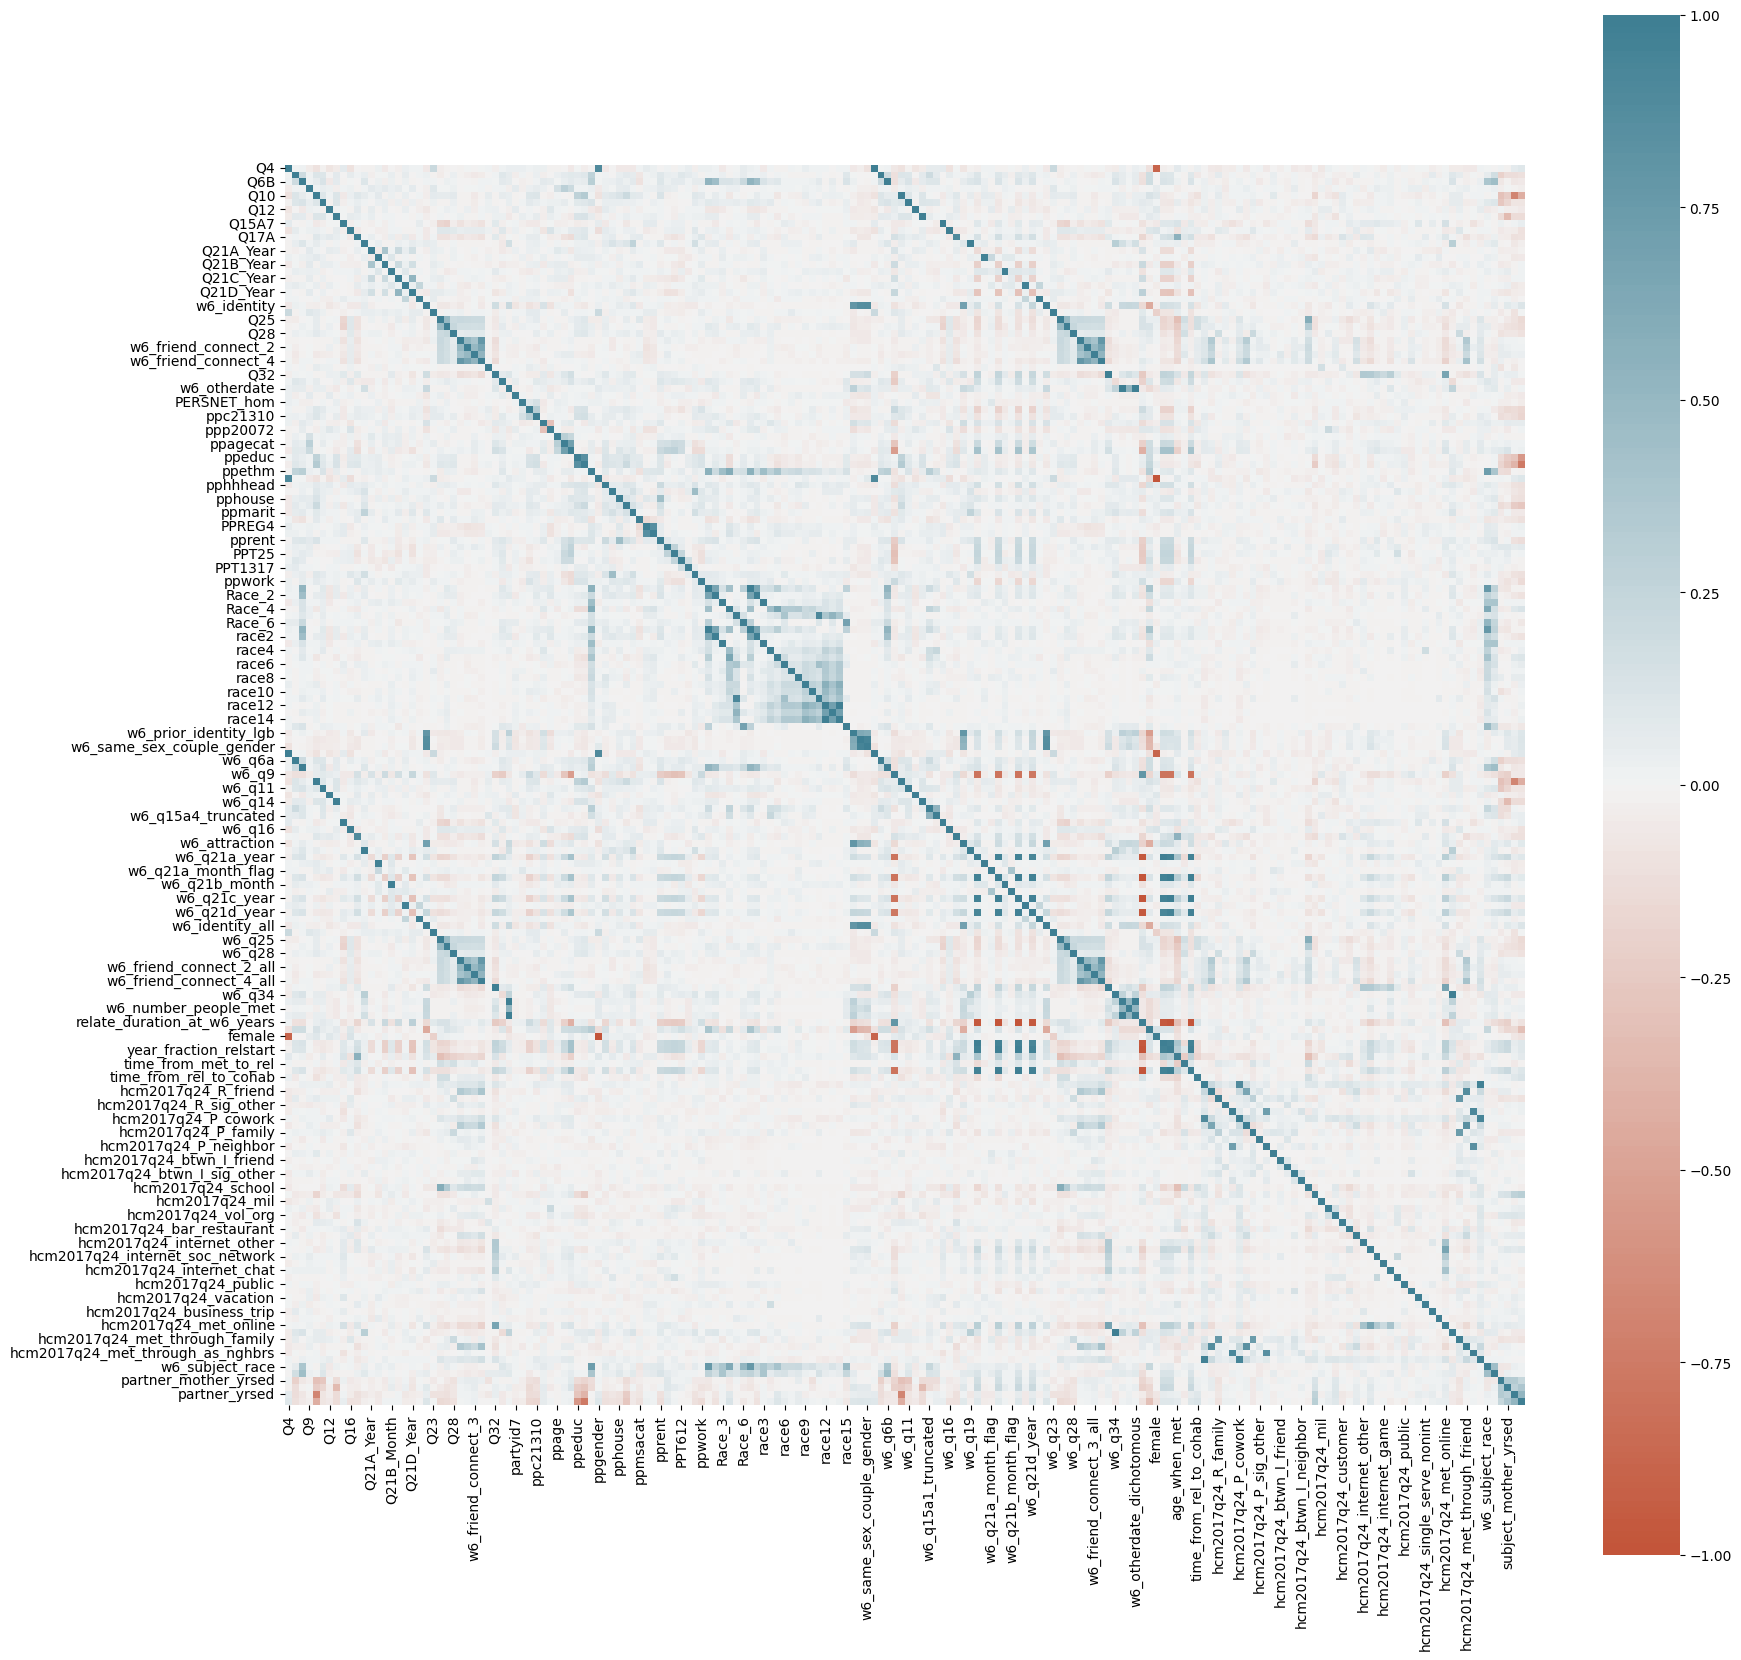

In [116]:
plt.subplots(figsize=(20, 20))   
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr

In [117]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# Drop features 
X.drop(to_drop, axis=1, inplace=True)

C:\Users\Carlt\AppData\Local\Temp\ipykernel_4084\1014693569.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Q4       Q6A       Q6B        Q9       Q10  \
Q4                    1.000000  0.002091  0.015711 -0.046464 -0.096914   
Q6A                   0.002091  1.000000  0.189731  0.022640  0.113793   
Q6B                   0.015711  0.189731  1.000000  0.008862  0.054853   
Q9                   -0.046464  0.022640  0.008862  1.000000  0.017973   
Q10                  -0.096914  0.113793  0.054853  0.017973  1.000000   
...                        ...       ...       ...       ...       ...   
interracial_5cat     -0.000237  0.173380  0.458917  0.033868  0.015078   
partner_mother_yrsed  0.013556 -0.207951 -0.063309 -0.029853 -0.308734   
subject_mother_yrsed -0.008183 -0.125731 -0.014465  0.002288 -0.241617   
partner_yrsed         0.069151 -0.119311 -0.075280 -0.010643 -0.680758   
subject_yrsed         0.094221 -0.111572 -0.050089 -0.031165 -0.430288   

                           Q11       Q12       Q14     Q15A7       Q16  ...  \
Q4                   -0.020261 -0.079965 -0.042289  0.062511 -0.095370  ...   
Q6A                   0.107017 -0.001649  0.070393 -0.003552  0.049510  ...   
Q6B                   0.120961 -0.050690  0.066581 -0.022034  0.005508  ...   
Q9                    0.039198  0.027145 -0.031205  0.015511  0.030415  ...   
Q10                   0.104557  0.021546  0.114676 -0.056647  0.032669  ...   
...                        ...       ...       ...       ...       ...  ...   
interracial_5cat      0.105707 -0.034389 -0.012466 -0.013006 -0.018957  ...   
partner_mother_yrsed -0.259984  0.019851 -0.133643  0.029694 -0.049613  ...   
subject_mother_yrsed -0.173508 -0.032325 -0.350556 -0.001718 -0.036386  ...   
partner_yrsed        -0.084833 -0.038158 -0.133977  0.020531 -0.040323  ...   
subject_yrsed        -0.081635 -0.049661 -0.133424  0.041813 -0.106049  ...   

                      hcm2017q24_business_trip  hcm2017q24_work_neighbors  \
Q4                                   -0.032986                  -0.008231   
Q6A                                   0.065869                  -0.028620   
Q6B                                   0.004926                   0.022559   
Q9                                    0.033336                   0.016095   
Q10                                  -0.032704                   0.001702   
...                                        ...                        ...   
interracial_5cat                      0.010521                   0.023658   
partner_mother_yrsed                  0.018478                   0.017083   
subject_mother_yrsed                  0.023978                   0.018355   
partner_yrsed                         0.059232                  -0.004082   
subject_yrsed                         0.024268                   0.043513   

                      hcm2017q24_met_online  hcm2017q24_met_through_family  \
Q4                                 0.006893                      -0.041544   
Q6A                                0.014054                       0.047895   
Q6B                                0.000007                      -0.001843   
Q9                                 0.026283                       0.026183   
Q10                               -0.012983                       0.062131   
...                                     ...                            ...   
interracial_5cat                   0.052362                      -0.034585   
partner_mother_yrsed               0.037569                      -0.090802   
subject_mother_yrsed               0.071674                      -0.080507   
partner_yrsed                      0.048043                      -0.078072   
subject_yrsed                      0.040537                      -0.094713   

                      w6_subject_race  interracial_5cat  partner_mother_yrsed  \
Q4                           0.004112         -0.000237              0.013556   
Q6A                          0.051894          0.173380             -0.207951   
Q6B                          0.376782          0.458917             -0.063309   
Q9  

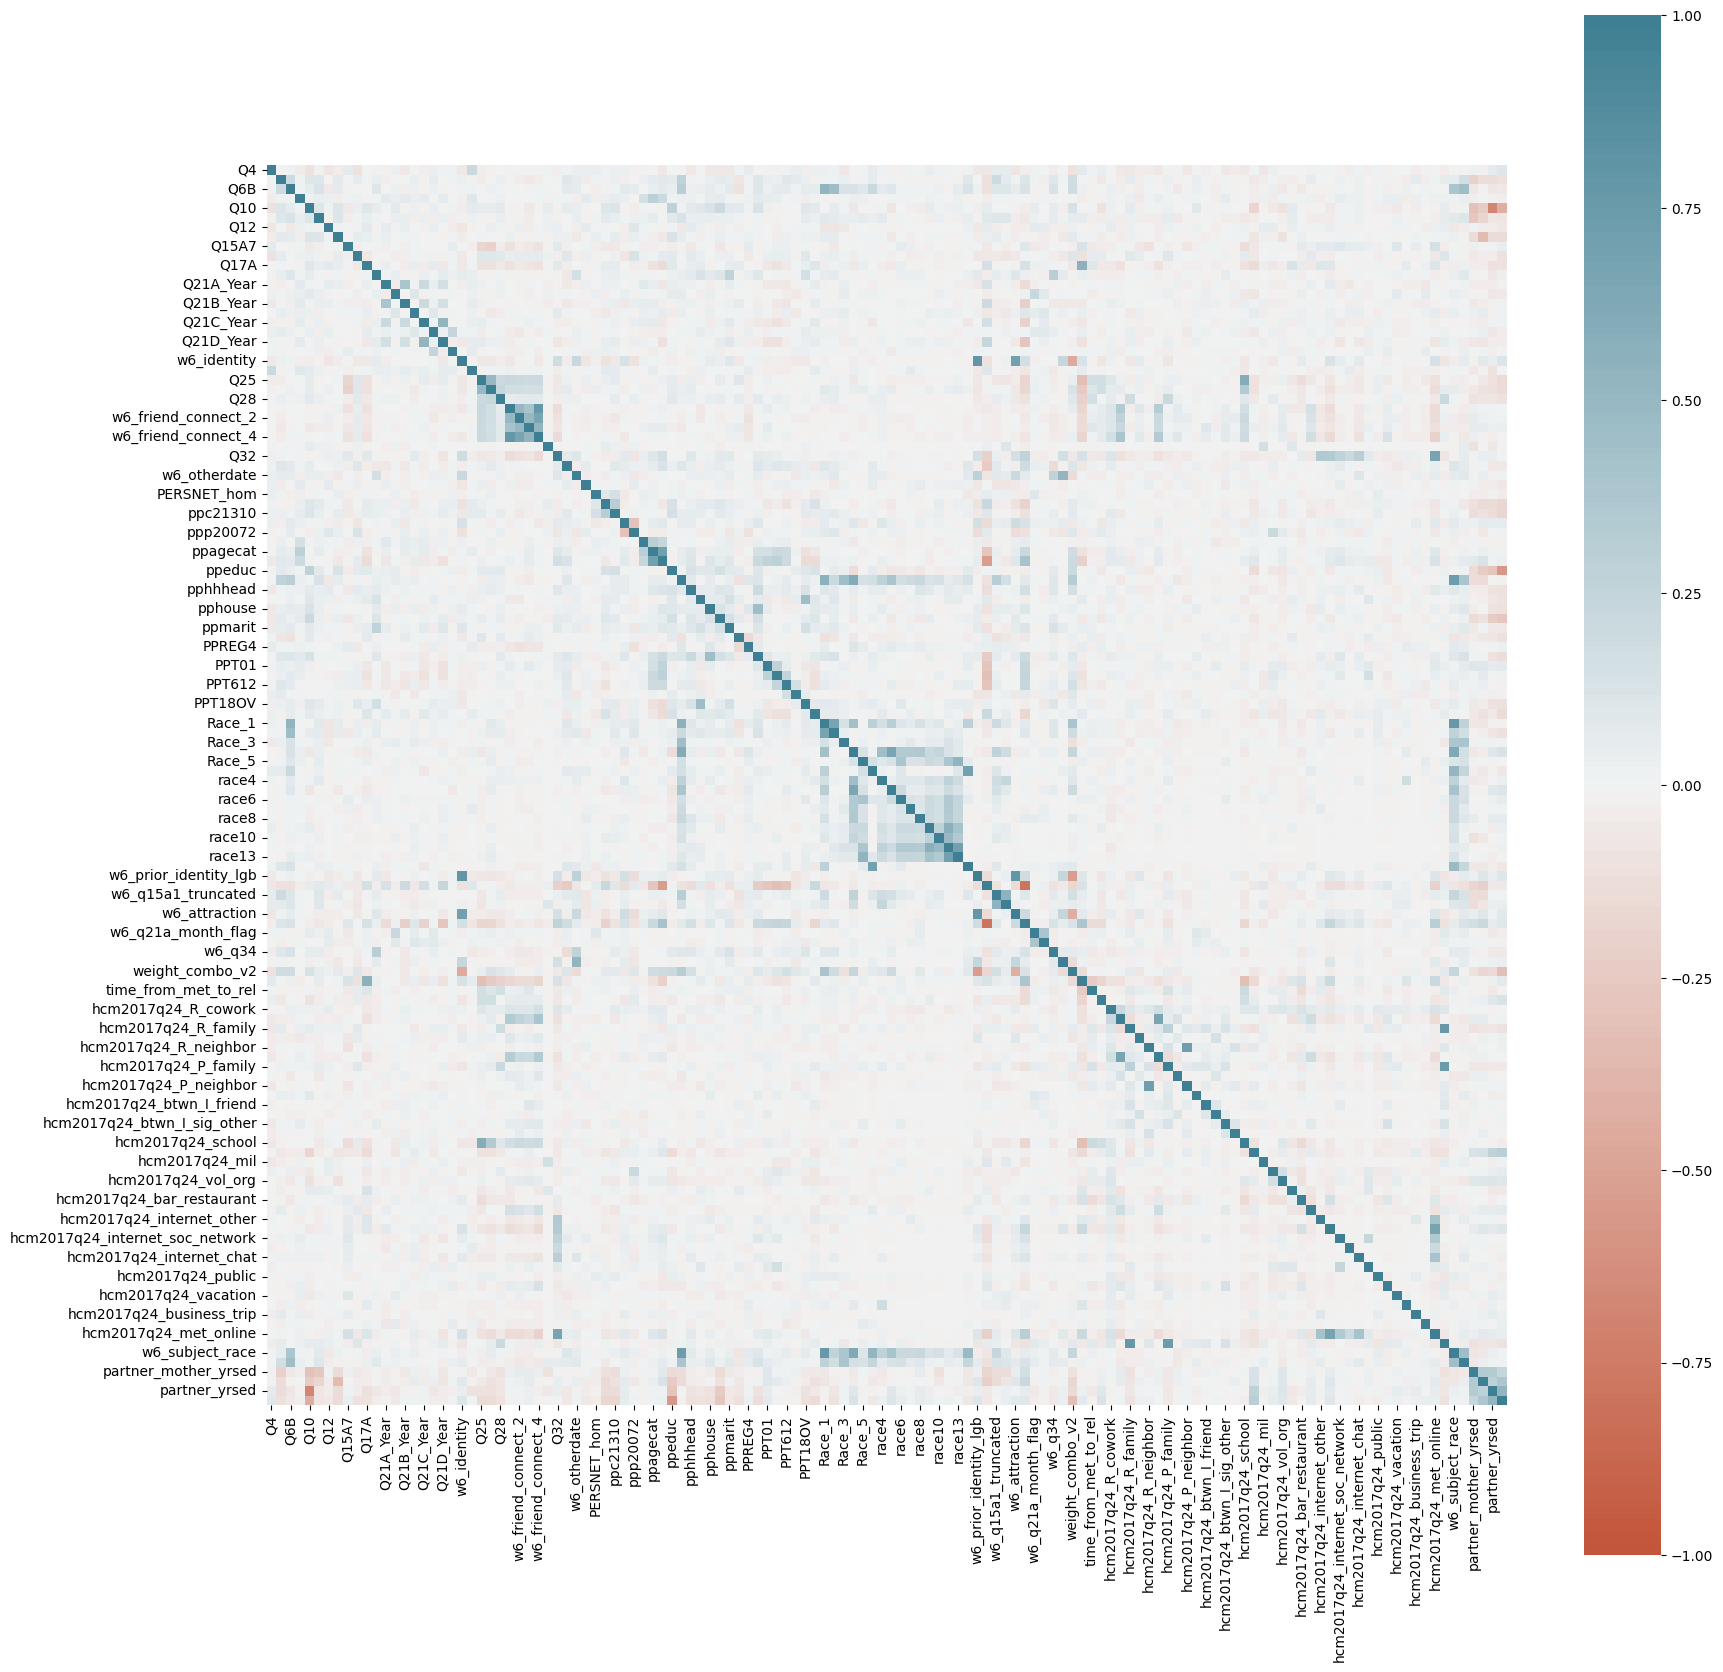

In [118]:
plt.subplots(figsize=(20, 20))   
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [120]:
#Here I decompose each row into 10 principal components
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the all married set:
pca_married_results, pca_married = pca_dec(df_married, 10)

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 10)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 10)

#Creating a table with the explained variance ratio
# names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
# scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
# print(scree)


#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_married.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.938830
1   PCA Component 2                  0.029162
2   PCA Component 3                  0.007166
3   PCA Component 4                  0.004671
4   PCA Component 5                  0.004591
5   PCA Component 6                  0.003461
6   PCA Component 7                  0.002706
7   PCA Component 8                  0.001934
8   PCA Component 9                  0.001835
9  PCA Component 10                  0.000761


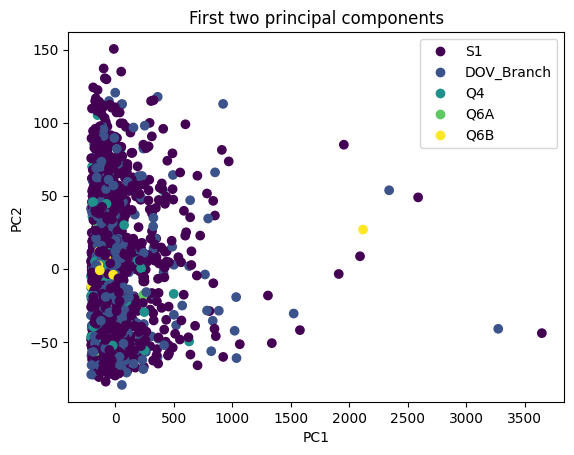

0          1          2          3          4          5  \
0       5.198816 -15.691345 -63.121784 -12.508107 -11.367640  -6.497142   
1    -120.624556 -55.050881 -53.017685 -15.840214 -11.889956  -6.182332   
2     440.090048  11.937548 -64.758881 -10.929737 -10.044715  -7.326761   
3    -100.922284  15.166153 -62.643778  -8.904764  -9.449751  -4.712727   
4     -97.113694  56.021402 -68.151156  -4.213803  -7.814498  -4.034561   
...          ...        ...        ...        ...        ...        ...   
1801  923.661774 -60.352707  31.386950 -13.288458  -8.608701  19.085939   
1802 -157.975380  39.619153   4.718776   0.496382 -20.621252 -19.643298   
1803  118.271441 -19.403549   4.126804  26.904176 -22.541090 -24.085309   
1804  -29.304329 -62.640531  58.963279   0.842962  28.488970  -5.412242   
1805 -185.451957 -56.959737  49.179369  -8.530698 -34.728059  20.849816   

              6          7         8         9  
0      3.008724  -2.234558 -6.129984  0.236350  
1      2.192308  -1.276383  8.662401 -5.196514  
2      3.329298  -3.282536 -0.763574 -6.510186  
3      2.880829  -3.114016 -0.588674 -5.612122  
4      3.450726  -3.941034 -7.723042 -5.623106  
...         ...        ...       ...       ...  
1801 -32.931395 -25.630666  9.150555 -1.956063  
1802   3.560756  18.589121  8.161125 -4.504783  
1803   1.987462  15.710594 -9.172170 -1.466062  
1804 -37.143093   7.565256  0.269520 -7.408998  
1805  -2.583376 -20.901270  5.467580 -6.398595  

[1806 rows x 10 columns]

In [121]:
#Decomposing the train set:
pca_train_results, pca_train = pca_dec(df_married, 10)
pca = PCA(10)
pca_result = pca.fit_transform(df_married)


plot = plt.scatter(pca_result[:,0], pca_result[:,1], c=y)



plt.legend(handles=plot.legend_elements()[0], labels=list(df_married.columns))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

pdf = pd.DataFrame(data= pca_result)
pdf



In [122]:

#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_train.components_[1], 'Variable Names':list(df_married.columns)}) #[0] = PCA1, [1] = PCA2 ...
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

# print(df2.head(20))
print(df.head(20))

          PCA               Variable Names
130  0.332003  relate_duration_at_w6_years
92   0.266788                        w6_q9
20   0.137389                    Q21D_Year
16   0.107805                    Q21B_Year
18   0.099862                    Q21C_Year
14   0.078318                    Q21A_Year
94   0.006841                       w6_q11
7    0.006841                          Q11
139  0.004477       time_from_rel_to_cohab
116  0.004195                w6_q24_length
63   0.004143                       ppwork
5    0.004127                           Q9
41   0.003671                     ppp20072
38   0.002722                     ppc10017
39   0.002583                     ppc21310
93   0.002118                       w6_q10
6    0.002118                          Q10
45   0.002019                       ppeduc
8    0.001934                          Q12
95   0.001934                       w6_q12


In [123]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

my_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)

predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str (mean_absolute_error(predictions, y_test)))


[11:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.73164	validation_1-rmse:0.66275
[100]	validation_0-rmse:0.27673	validation_1-rmse:0.24826
[200]	validation_0-rmse:0.10480	validation_1-rmse:0.09334
[300]	validation_0-rmse:0.03978	validation_1-rmse:0.03517
[400]	validation_0-rmse:0.01514	validation_1-rmse:0.01328
[500]	validation_0-rmse:0.00577	validation_1-rmse:0.00503
[600]	validation_0-rmse:0.00221	validation_1-rmse:0.00191
[700]	validation_0-rmse:0.00085	validation_1-rmse:0.00072
[800]	validation_0-rmse:0.00033	validation_1-rmse:0.00028
[900]	validation_0-rmse:0.00013	validation_1-rmse:0.00011
[1000]	validation_0-rmse:0.00005	validation_1-rmse:0.00005
[1100]	validation_0-rmse:0.00004	validation_1-rmse:0.00003
[1181]	validation_0-rmse:0.00004	validation_1-rmse:0.00003
Mean Absolute Error : 2.4993348764740056e-05


In [124]:
#split with pca data

X_pca = pdf
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y,test_size=0.33,random_state = 42)

In [125]:
#XGboost with PCA data

my_model_pca = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
# Add silent=True to avoid printing out updates with each cycle
my_model_pca.fit(X_train_pca, y_train_pca,
                eval_set=[(X_train_pca, y_train_pca), (X_test_pca, y_test_pca)],
                verbose=100)

predictions_pca = my_model_pca.predict(X_test_pca)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str (mean_absolute_error(predictions_pca, y_test_pca)))

[11:05:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.73832	validation_1-rmse:0.66914
[100]	validation_0-rmse:0.70702	validation_1-rmse:0.66289
[200]	validation_0-rmse:0.68860	validation_1-rmse:0.66304
[241]	validation_0-rmse:0.68188	validation_1-rmse:0.66360
Mean Absolute Error : 0.5552138772936875


In [126]:
print(pca.explained_variance_ratio_)


[9.38829913e-01 2.91617574e-02 7.16630732e-03 4.67091074e-03
 4.59132064e-03 3.46063351e-03 2.70643831e-03 1.93381170e-03
 1.83495074e-03 7.60557882e-04]


## New PCA + Kmeans

In [127]:
pca = PCA(n_components=10)
x_10d = pca.fit_transform(X)

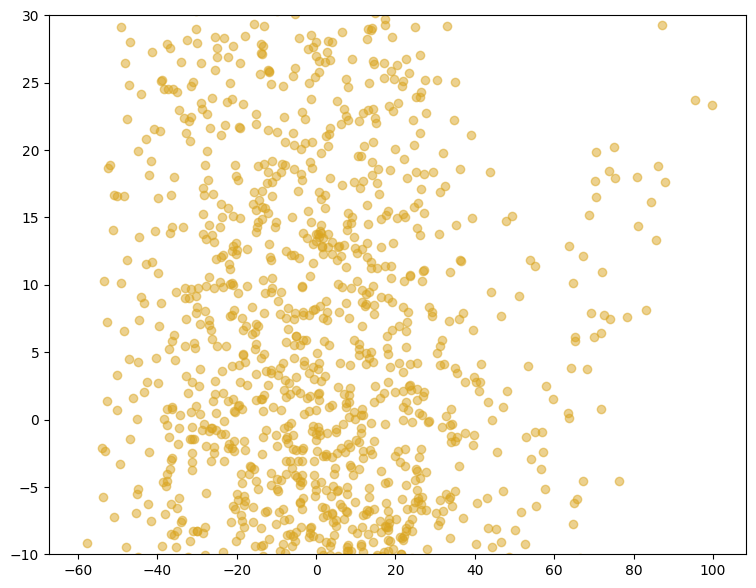

In [128]:
plt.figure(figsize = (9,7))
plt.scatter(x_10d[:,0],x_10d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

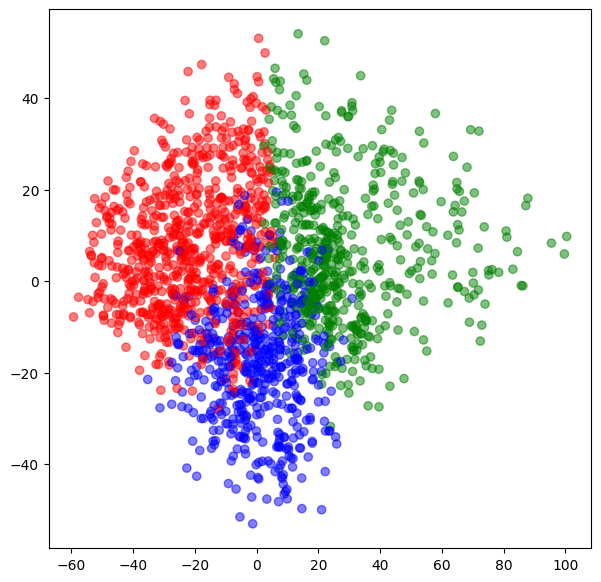

In [129]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_10d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_10d[:,0],x_10d[:,2], c= label_color, alpha=0.5) 
plt.show()

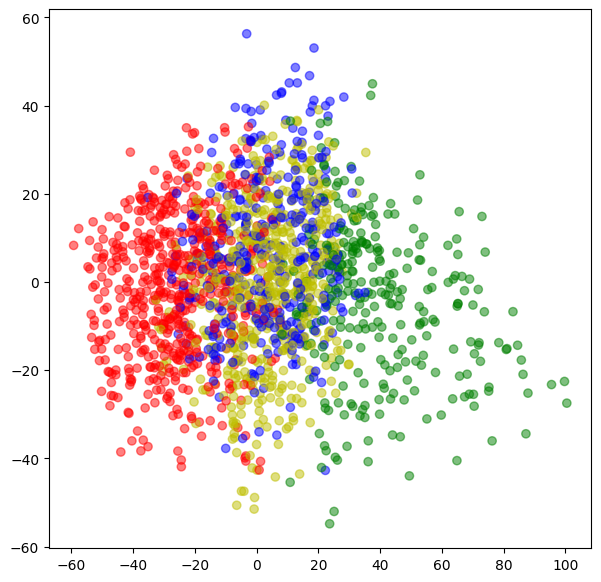

In [130]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_10d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_10d[:,0],x_10d[:,3], c= label_color, alpha=0.5) 
plt.show()

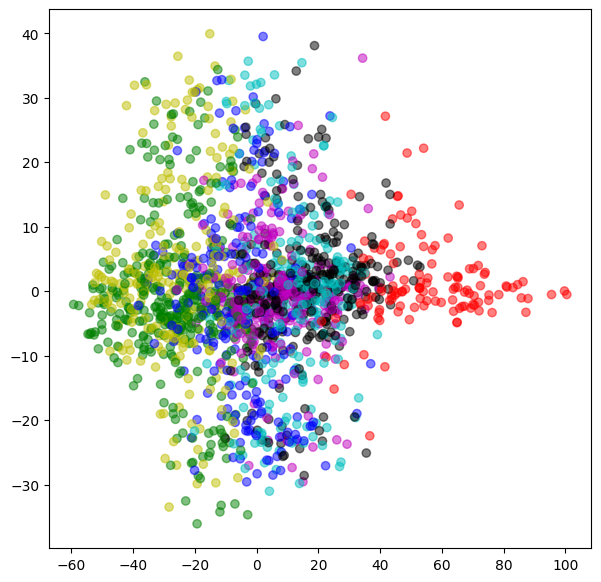

In [131]:
# Set a 7 KMeans clustering
kmeans = KMeans(n_clusters=7)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_10d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y',4:'m',5:'c',6:'k'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_10d[:,0],x_10d[:,6], c= label_color, alpha=0.5) 
plt.show()

In [132]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_10d)
df = df[[0,1,2,3,4,5]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

C:\Users\Carlt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


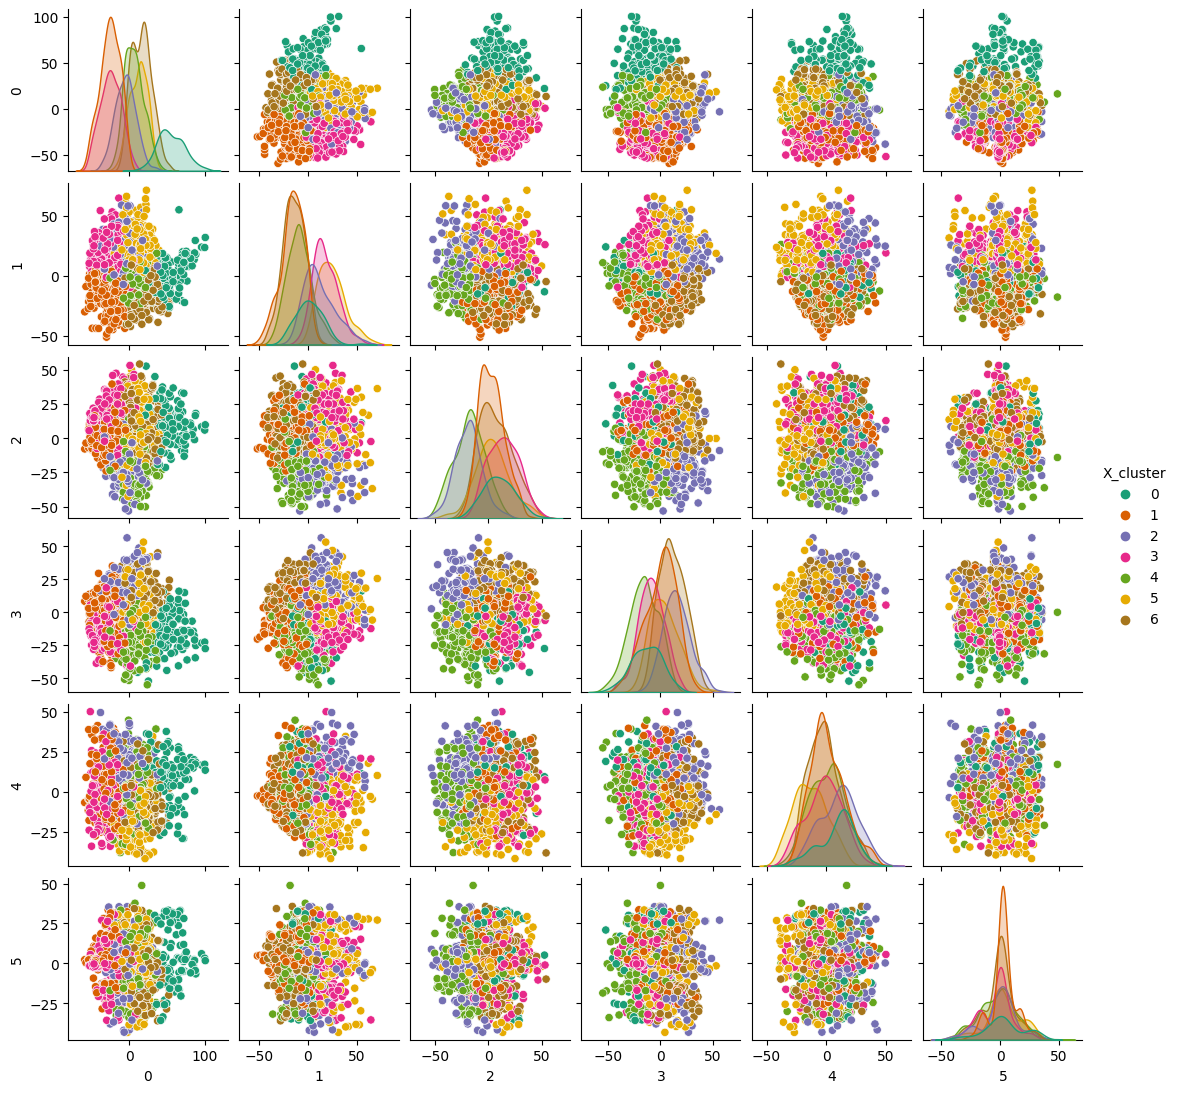

In [133]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)